In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
url = 'https://raw.githubusercontent.com/SanBigDataProjects/Complete-Data-Science_NLP/main/Data/Data/height-weight.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(url)

# Display the first few rows of the data
print(data.head())


   Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160


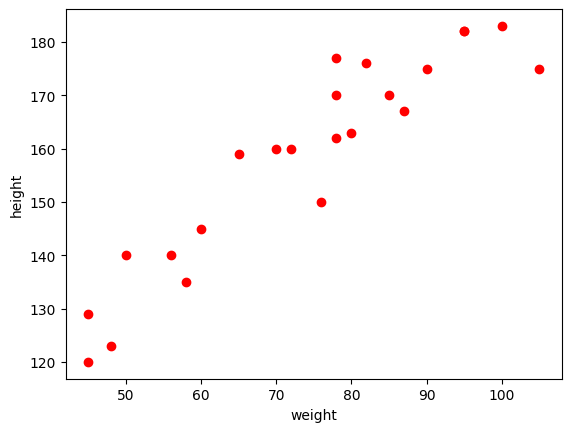

In [75]:
# craeting a visula to see they are co-realated or not
plt.scatter(data["Weight"],data["Height"],color="red")
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [76]:
corr_matrix=data.corr()
height_corr= corr_matrix["Height"].sort_values(ascending=True)

In [77]:
height_corr

Weight    0.931142
Height    1.000000
Name: Height, dtype: float64

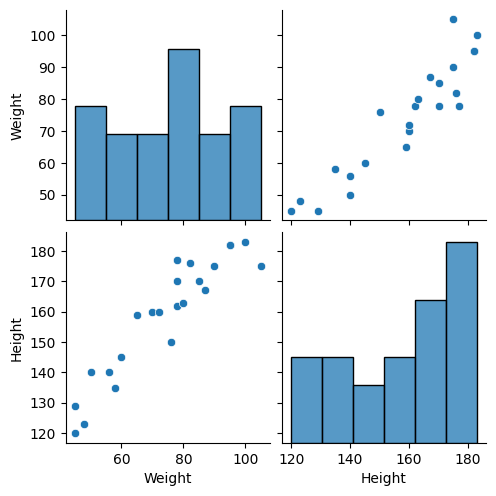

In [78]:
sns.pairplot(data=data)

In [79]:
from sklearn.model_selection import train_test_split
x=data[["Weight"]] # independent should be 2 dimensional or dataframe
y=data["Height"]

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [80]:
#lr.coef_

In [81]:
#lr.intercept_

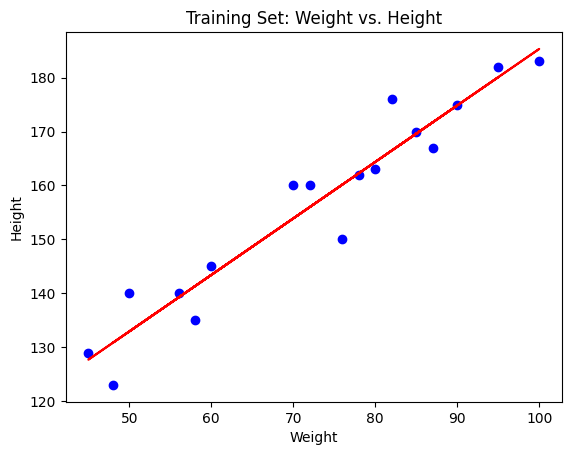

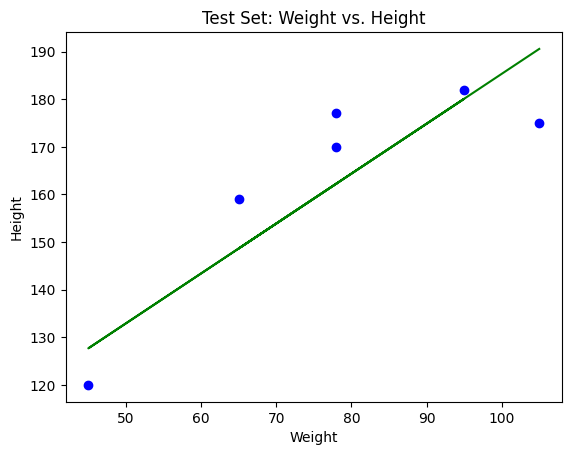

In [89]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Renamed to x_train_scaled
x_test_scaled = scaler.transform(x_test)        # Renamed to x_test_scaled

# Train a linear regression model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# Make predictions on the scaled training data
y_pred_train = lr.predict(x_train_scaled)

# Plot the scatter plot of the original (non-scaled) x_train and y_train
plt.scatter(x_train, y_train, color="blue")

# Plot the regression line based on the predictions
plt.plot(x_train, y_pred_train, color="red")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Training Set: Weight vs. Height")
plt.show()

# Make predictions on the scaled test data
y_pred_test = lr.predict(x_test_scaled)

# Plot the scatter plot of the original x_test and y_test
plt.scatter(x_test, y_test, color="blue")

# Plot the regression line using the test set predictions
plt.plot(x_test, y_pred_test, color="green")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Test Set: Weight vs. Height")
plt.show()

In [86]:
residual= y_pred_test- y_test
residual

15   -14.735003
9     -7.735003
0      7.683471
8     -1.920277
17   -10.358028
12    15.558973
Name: Height, dtype: float64

In [87]:
from sklearn.metrics import r2_score
r2=r2_score(y_pred_test,y_test)
r2

0.7242334405003442

In [88]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6552918006254302

In [92]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train_scaled).fit()

In [93]:
prediction_value=model.predict(x_test_scaled)
prediction_value

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [95]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                       0.664
Time:                        14:02:23   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Sam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [100]:
# prediction for the new data
lr.predict(scaler.transform([[72]]))

C:\Users\Sam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])